In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def delta(t, t_sp):
    if t in t_sp:
        return 1
    else:
        return 0

def REI_model(r_t, e_t, i_t, u_t, t_rec, t_ina, t_fac, U, dt, t):
    du = - u_t / t_fac + U * (1 - u_t) * delta(t, t_sp)
    u_t = u_t + du * dt
    
    dr = i_t / t_rec - u_t * r_t * delta(t, t_sp) *(1/dt)
    de = - e_t / t_ina + u_t * r_t * delta(t,t_sp) * (1/dt)
    di =  e_t / t_ina - i_t / t_rec
    
    r_t_ = r_t + dr * dt
    e_t_ = u_t + du * dt
    i_t_ = i_t + di * dt
    
    return r_t_, e_t_, i_t_, u_t

In [5]:
r = 1.
e = 0
i = 0
u = 0.2

#mili second
t_rec = 200
t_ina = 2
t_fac = 10

U = 0.2
A_se = 10

dt = 0.01

T = 300 * (1/dt)
intT = int(T)

time = np.zeros(intT)

r_t = np.zeros(intT)
e_t = np.zeros(intT)
i_t = np.zeros(intT)
V_t = np.zeros(intT)

u_t = np.zeros(intT)
t_sp_forplot = np.zeros(intT)


r_t[0] = r
e_t[0] = e
i_t[0] = i
V_t[0] = A_se * e
u_t[0] = u

t_sp = [10,30,50,70,90,110,130,150,170,190,210,230,250,270,290]

for i in range(intT - 1):
    time[i+1] = i * dt
    r_t[i+1], e_t[i+1], i_t[i+1], u_t[i+1] = REI_model(r_t[i], e_t[i], i_t[i], u_t[i], t_rec, t_ina, t_fac, U, dt, i * dt)
    V_t[i+1] = e_t[i+1] * A_se
    if delta(i*dt, t_sp):
        t_sp_forplot[i] = 0.01

[1.         1.         1.         ... 1.69744405 1.69745962 1.69747519]
[0.2        0.1998     0.1996002  ... 0.0008535  0.00085265 0.0008518 ]


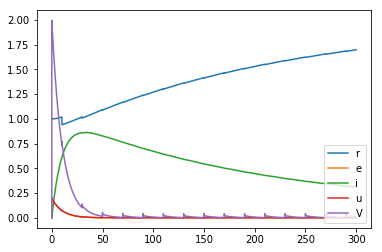

In [21]:
print(r_t)
print(u_t)
plt.plot(time, r_t, label="r")
plt.plot(time, e_t, label="e")
plt.plot(time, i_t, label="i")
plt.plot(time, u_t, label="u")
plt.plot(time, V_t, label="V")
plt.legend(loc="lower right")